In [1]:
Quote = ("Commit to the Lord whatever you do, and he will establish your plans.")
Book = (" Proverbs 16:3")
print(Quote + Book)
print("Notebook written by Milton Abreu! Date: 2020 - 07 - 26")

Commit to the Lord whatever you do, and he will establish your plans. Proverbs 16:3
Notebook written by Milton Abreu! Date: 2020 - 07 - 26


In [2]:
# Libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the data and taking a first look
Aksum_res = pd.read_csv("Aksum_Empty_Campus.csv") # Aksum Residence
Maps_res = pd.read_csv("MAPS_EMPTY_CAMPUS.csv") # Maps Residence
Songhai_res = pd.read_csv("Songhai_Empty_Campus.csv") # Songhai Residence

premise1 = pd.read_csv("Hourly_Aksum.csv") # Aksum Residence
premise2 = pd.read_csv("Hourly_Maps.csv") # Maps Residence
premise3 = pd.read_csv("Hourly_Songhai.csv") # Songhai Residence

#Aksum_res.head(100) # uncomment to take a look at the first 100 rows of the data set

In [4]:
# Renaming a column that was wrongly labeled/named
premise1 = premise1.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Aksum - Academic Season') for x in premise1.columns})
premise2 = premise2.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Maps - Academic Season') for x in premise2.columns})
premise3 = premise3.rename(columns={x:x.replace('Total Active Power (kW)', 'Total Active Power (kW): Songhai - Academic Season') for x in premise3.columns})

Aksum_res = Aksum_res.rename(columns={x:x.replace('Songhai', 'Aksum') for x in Aksum_res.columns})

In [7]:
# Converting the date column values to a datetime data type 
Aksum_res['Date'] = pd.to_datetime(Aksum_res['Date'],format='%d/%m/%Y %H:%M')
Maps_res['Date'] = pd.to_datetime(Maps_res['Date'],format='%d/%m/%Y %H:%M')
Songhai_res['Date'] = pd.to_datetime(Songhai_res['Date'],format='%d/%m/%Y %H:%M')
#Aksum_res['Date'] # Uncomment to check it out

premise1['Date'] = pd.to_datetime(premise1['Date'],format='%d/%m/%Y %H:%M')
premise2['Date'] = pd.to_datetime(premise2['Date'],format='%d/%m/%Y %H:%M')
premise3['Date'] = pd.to_datetime(premise3['Date'],format='%d/%m/%Y %H:%M')
#premise3['Date'] # Uncomment to check it out

#Getting the data for the months of April and May
premise11 = premise1.iloc[744:2208]
premise22 = premise2.iloc[744:2208]
premise33 = premise3.iloc[744:2208]

# Data on hourly basis for two months only
Premise_1_hour = premise11.groupby(premise1.Date.dt.time).mean()
Premise_2_hour = premise22.groupby(premise1.Date.dt.time).mean()
Premise_3_hour = premise33.groupby(premise1.Date.dt.time).mean()

Aksum_res_hour = Aksum_res.groupby(Aksum_res.Date.dt.time).mean()
Maps_res_hour = Maps_res.groupby(Maps_res.Date.dt.time).mean()
Songhai_res_hour = Songhai_res.groupby(Songhai_res.Date.dt.time).mean()

In [8]:
#Getting the Power
Songhai_power = Songhai_res.filter(['Total Active Power: Songhai (kW)','Active Power Red-Phase: Songhai (kW)','Active Power White-Phase: Songhai (kW)','Active Power Blue-Phase: Songhai (kW)'], axis = 1)
Maps_power = Maps_res.filter(['Total Active Power: Maps (kW)','Active Power Red-Phase: Maps (kW)','Active Power White-Phase: Maps (kW)','Active Power Blue-Phase: Maps (kW)'],axis = 1)
Aksum_power = Aksum_res.filter(['Total Active Power: Aksum (kW)','Active Power Red-Phase: Aksum (kW)','Active Power White-Phase: Aksum (kW)','Active Power Blue-Phase: Aksum (kW)'], axis = 1)
#Aksum_power.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file   

P_1 = Premise_1_hour.filter(['Total Active Power (kW): Aksum','Active Power Red-Phase: Aksum (kW)','Active Power White-Phase: Aksum (kW)','Active Power Blue-Phase: Aksum (kW)'], axis = 1)
P_2 = Premise_2_hour.filter(['Total Active Power (kW): Maps', 'Active Power Red-Phase: Maps (kW)','Active Power White-Phase: Maps (kW)','Active Power Blue-Phase: Maps (kW)'], axis = 1)
P_3 = Premise_3_hour.filter(['Total Active Power (kW): Songhai','Active Power Red-Phase: Songhai (kW)','Active Power White-Phase: Songhai (kW)','Active Power Blue-Phase: Songhai (kW)'], axis = 1)
#P_1.to_csv(r'C:\Users\MILTON ABREU\Documents\Data_books\Final_Analysis\Clean_Data\Frequency.csv') # save it as csv file   

# Cleaning the data
P_1 = P_1.replace(0,np.NaN); P_2 = P_2.replace(0,np.NaN); P_3 = P_3.replace(0,np.NaN) # Replace zeros with nan and then drop it
P_1.dropna(axis = 0, how ='any');P_2.dropna(axis = 0, how ='any');P_3.dropna(axis = 0, how ='any') # Getting rid of the empty cells or 'missing data'

Songhai_power.index = Songhai_res['Date'];Maps_power.index = Maps_res['Date'];Aksum_power.index = Aksum_res['Date']
Songhai_power = Songhai_power.replace(0,np.NaN);Maps_power = Maps_power.replace(0,np.NaN);Aksum_power = Aksum_power.replace(0,np.NaN)
Songhai_power.dropna(axis = 0, how ='any');Maps_power.dropna(axis = 0, how ='any');Aksum_power.dropna(axis = 0, how ='any');


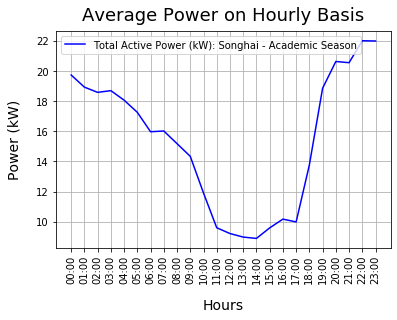

In [9]:
#fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Power graphs for sum
#Premise_1_hour.plot(kind='line', y=['Total Active Power (kW): Aksum - Academic Season'], color=['red'], ax=ax)
#Premise_2_hour.plot(kind='line', y=['Total Active Power (kW): Maps - Academic Season'], color=['green'], ax=ax)
Premise_3_hour.plot(kind='line', y=['Total Active Power (kW): Songhai - Academic Season'], color=['blue'], ax=ax)

#Aksum_res_hour.plot(kind='line', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
#Maps_res_hour.plot(kind='line', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
#Songhai_res_hour.plot(kind='line', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)


plt.title("Average Power on Hourly Basis", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.xticks(Premise_1_hour.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\power_sum1.jpg')# uncomment to save the image

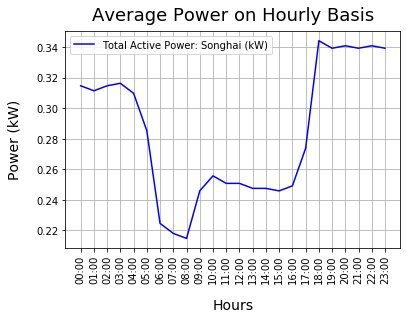

In [10]:
#fig = plt.figure(figsize=(15, 6)) # Setting the right size for the graph
ax = plt.gca() # gca stands for 'get current axis'

## Monthly basis - Power graphs for sum
#Premise_1_hour.plot(kind='line', y=['Total Active Power (kW): Aksum - Academic Season'], color=['red'], ax=ax)
#Premise_2_hour.plot(kind='line', y=['Total Active Power (kW): Maps - Academic Season'], color=['green'], ax=ax)
#Premise_3_hour.plot(kind='line', y=['Total Active Power (kW): Songhai - Academic Season'], color=['blue'], ax=ax)

#Aksum_res_hour.plot(kind='line', y=['Total Active Power: Aksum (kW)'], color=['red'], ax=ax)
#Maps_res_hour.plot(kind='line', y=['Total Active Power: Maps (kW)'], color=['green'], ax=ax)
Songhai_res_hour.plot(kind='line', y=['Total Active Power: Songhai (kW)'], color=['blue'], ax=ax)


plt.title("Average Power on Hourly Basis", fontsize=18, y=1.02)
plt.xlabel("Hours", fontsize=14, labelpad=15)
plt.ylabel("Power (kW)", fontsize=14, labelpad=15)
plt.xticks(Premise_1_hour.index, rotation=90)
plt.grid(True)
#fig.savefig(r'C:\Users\MILTON ABREU\Documents\Data_books\Graphs\power_sum1.jpg')# uncomment to save the image

In [116]:
premise_A = premise1.iloc[1464:2208]
premise_M = premise2.iloc[1464:2208]
premise_S = premise3.iloc[1464:2208]

premise_A.columns

Index(['Date', 'Voltage Red-Phase (V)', 'Voltage White-Phase (V)',
       'Voltage Bule-Phase (V)', 'Current Red-Phase (A)',
       'Current White-Phase (A)', 'Current Bule-Phase (A)',
       'Total Active Power (kW): Aksum - Academic Season',
       'Active Power Red-Phase (kW)', 'Active Power White-Phase (kW)',
       'Active Power Bule-Phase (kW)', 'Total Reactive Power (kVAr)',
       'Reactive Power Red-Phase (kVAr)', 'Reactive Power White-Phase (kVAr)',
       'Reactive Power Bule-Phase (kVAr)', 'Total Demand (kVA)',
       'Demand Red-Phase (kVA)', 'Demand White-Phase (kVA)',
       'Demand Bule-Phase (kVA)', 'Total Power Factor',
       'Power Factor Red-Phase', 'Power Factor White-Phase',
       'Power Factor Bule-Phase', 'Total Power Consumed (kWh)',
       'Frequency (Hz): Aksum', 'Temperature (deg C)', 'Humidity (%)'],
      dtype='object')

In [121]:
P_AK_1month = premise_A[['Active Power Red-Phase (kW)', 'Active Power White-Phase (kW)',
       'Active Power Bule-Phase (kW)']].copy()

P_MA_1month = premise_M[['Active Power Red-Phase (kW)', 'Active Power White-Phase (kW)',
       'Active Power Bule-Phase (kW)']].copy()

P_SO_1month = premise_S[['Active Power Red-Phase (kW)', 'Active Power White-Phase (kW)',
       'Active Power Bule-Phase (kW)']].copy()

In [118]:
# Finding the mean or average of the 3-phase power ); use rows
P_AK_1month['Average Power (kW)'] = P_AK_1month.mean(axis=1)
P_MA_1month['Average Power (kW)'] = P_MA_1month.mean(axis=1)
P_SO_1month['Average Power (kW)'] = P_SO_1month.mean(axis=1)

# Finding the mean or average of the 3-phase power ); use rows
P_AK_1month['Average Power (kW)'] = P_AK_1month.mean(axis=1)
P_MA_1month['Average Power (kW)'] = P_MA_1month.mean(axis=1)
P_SO_1month['Average Power (kW)'] = P_SO_1month.mean(axis=1)

# Finding the max deviation from the mean
P_AK_1month['Max Deviation'] = P_AK_1month.max(axis=1) - P_AK_1month.mean(axis=1)
P_MA_1month['Max Deviation'] = P_MA_1month.max(axis=1) - P_MA_1month.mean(axis=1)
P_SO_1month['Max Deviation'] = P_SO_1month.max(axis=1) - P_SO_1month.mean(axis=1)

In [119]:
df2 = {'Aksum': (5484.00, 4585.80, 3966.60), 'Maps': (3594.40, 4096.70, 667.50), 'Songhai': (3324.20, 2852.70, 2237.30),'Average Power': (4134.19, 3845.07, 3290.47),'% Unbalance': ('32.65%','19.26%','20.55%')}
df3 = {'Residence':[['Active Power Red-Phase','Active Power White-Phase','Active Power Blue-Phase','Average Power','% Power Unbalance','LF']]}

In [120]:
P_AK_1month

,Active Power Red-Phase (kW),Active Power White-Phase (kW),Active Power Bule-Phase (kW),Total Power Factor,Average Power (kW),Max Deviation
1464,8.5,6.4,5.9,0.988,5.44700,3.05300
1465,7.3,5.4,4.9,0.986,4.64650,2.65350
1466,7.1,4.8,4.2,0.979,4.26975,2.83025
1467,6.7,4.7,4.4,0.980,4.19500,2.50500
1468,11.2,9.0,8.7,0.994,7.47350,3.72650
...,...,...,...,...,...,...
2203,8.3,5.0,4.4,0.981,4.67025,3.62975
2204,11.8,11.1,10.5,0.995,8.59875,3.20125
2205,15.4,12.7,12.2,0.997,10.32425,5.07575
2206,14.6,13.1,12.1,0.998,10.19950,4.40050


In [159]:
AK = premise_A[['Power Factor Red-Phase','Power Factor White-Phase','Power Factor Bule-Phase']].copy()
MA = premise_M[['Power Factor Red-Phase','Power Factor White-Phase','Power Factor Bule-Phase']].copy()
SO = premise_S[['Power Factor Red-Phase','Power Factor White-Phase','Power Factor Bule-Phase']].copy()

In [165]:
AK.mean(); MA.mean(); SO.mean()

Power Factor Red-Phase      0.908059
Power Factor White-Phase    0.948581
Power Factor Bule-Phase     0.976571
dtype: float64

In [166]:
LF_A = (0.95/0.94) * (0.95/0.93) * (0.95/0.99) * (0.3265/0.3333) * 100
LF_M = (0.95/0.91) * (0.95/0.95) * (0.95/0.98) * (0.1926/0.3333) * 100
LF_S = (0.95/0.86) * (0.95/0.91) * (0.95/0.99) * (0.2055/0.3333) * 100

In [172]:
LF_A; LF_M; LF_S

68.22951595626536